TASK-5B: Please give concrete examples for each of the 4 domains of machine learning including classification, regression, clustering, and dimensionality reduction.

1) Classification

feature 1: ağırlık
feature 2: boy

üstte kalan mavi sınıf zürafalar, alttaki kırmızı sınıf boğalar olabilir.

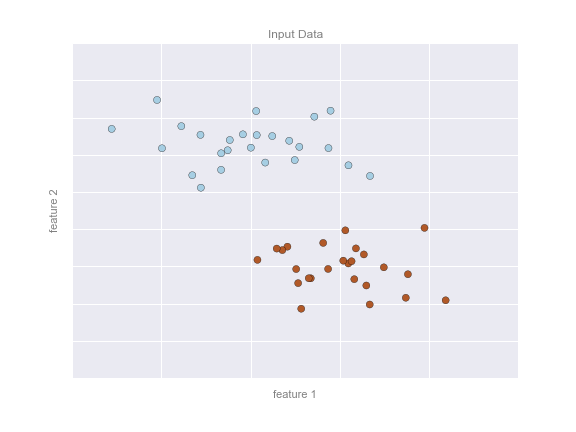

2) Regression

Feature 1: Su miktarı
Feature 2: Gübre miktarı

Bir bitkinin su ve gübre miktarına göre verimi olabilir.

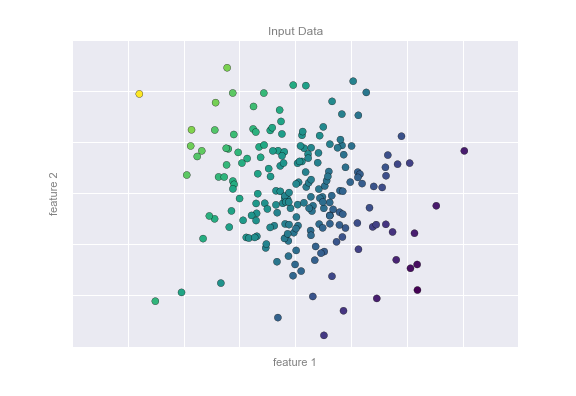

3) Clustering

Web 3.0 türünde hizmet sağlayan bir alışveriş sitesi kullanıcıların belli özelliklere göre ayrılması olabilir.

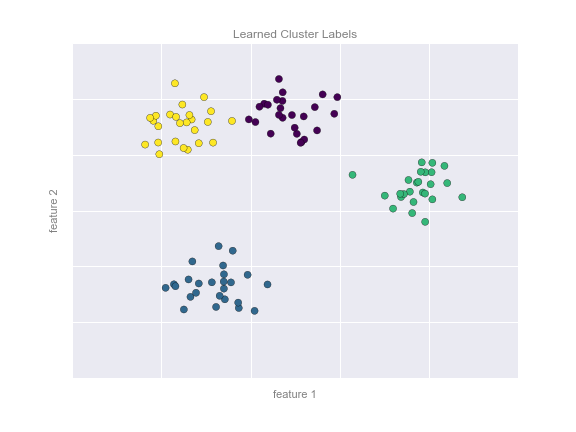

4) Dimensionality Reduction

Bir dağda zirveye giden yola ait nokta bulutu verisinin boyutsal indirgemeye uğramış hali olabilir.

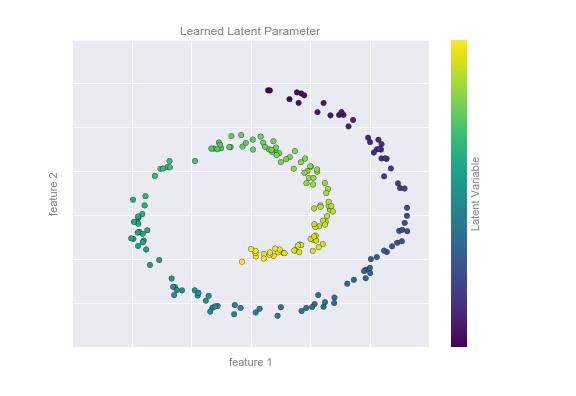

TASK-5C: Please run the GaussianNB algorithm for 20 different values with respect to varr_smoothing parameter to find the best model. Then please visualize your findings via a lineplot (matplotlib) to illustrate the more appropriate values/ranges.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.images.shape

(1797, 8, 8)

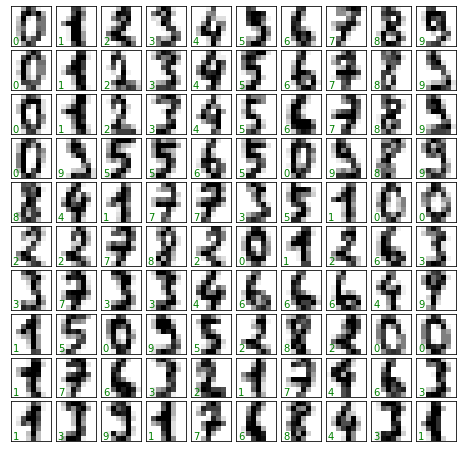

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
X = digits.data
X.shape

(1797, 64)

In [ ]:
y = digits.target
y.shape

(1797,)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
my_smoothies = np.linspace((1/(10**20)),1, num=20)
my_smoothies # I didn't like the results, I am gonna create a list in for loop

array([1.00000000e-20, 5.26315789e-02, 1.05263158e-01, 1.57894737e-01,
       2.10526316e-01, 2.63157895e-01, 3.15789474e-01, 3.68421053e-01,
       4.21052632e-01, 4.73684211e-01, 5.26315789e-01, 5.78947368e-01,
       6.31578947e-01, 6.84210526e-01, 7.36842105e-01, 7.89473684e-01,
       8.42105263e-01, 8.94736842e-01, 9.47368421e-01, 1.00000000e+00])

In [ ]:
my_smoothies = list()
a = 1
for i in range(20):
  my_smoothies.append(a)
  a /= 10

my_smoothies = sorted(my_smoothies,reverse=False)
my_smoothies

# That is better


[1.0000000000000001e-19,
 1e-18,
 1e-17,
 1.0000000000000001e-16,
 1e-15,
 1.0000000000000002e-14,
 1.0000000000000002e-13,
 1.0000000000000002e-12,
 1.0000000000000003e-11,
 1.0000000000000003e-10,
 1.0000000000000003e-09,
 1.0000000000000002e-08,
 1.0000000000000002e-07,
 1.0000000000000002e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1]

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

my_scores = list()

for i in my_smoothies:
  model = GaussianNB(var_smoothing=i)
  model.fit(Xtrain, ytrain)
  y_model = model.predict(Xtest)
  my_scores.append(accuracy_score(ytest, y_model))

GNB_acc = max(my_scores)
print(GNB_acc)
my_scores

0.9333333333333333


[0.7066666666666667,
 0.7177777777777777,
 0.7244444444444444,
 0.7288888888888889,
 0.7466666666666667,
 0.7533333333333333,
 0.7644444444444445,
 0.7822222222222223,
 0.8022222222222222,
 0.8088888888888889,
 0.8333333333333334,
 0.8422222222222222,
 0.8644444444444445,
 0.8777777777777778,
 0.8911111111111111,
 0.8933333333333333,
 0.9155555555555556,
 0.9333333333333333,
 0.9288888888888889,
 0.9044444444444445]

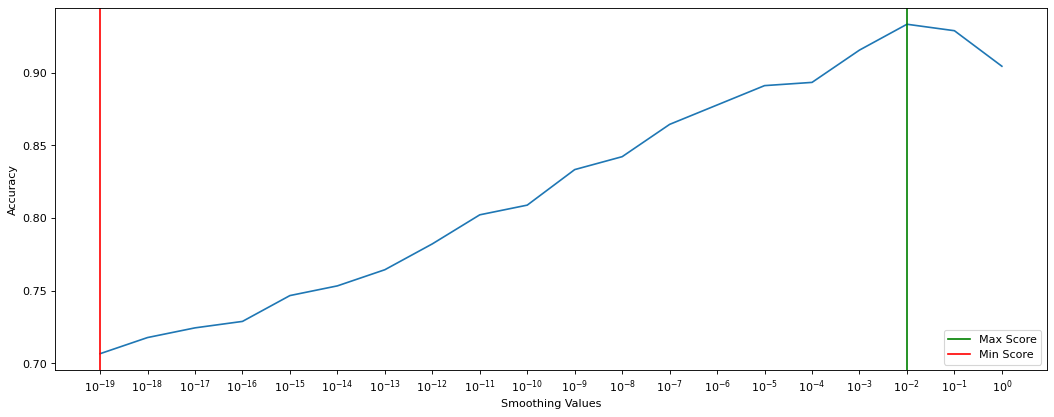

In [ ]:
plt.figure(figsize=(16, 6), dpi=80)
plt.plot(my_smoothies,my_scores)
plt.axvline(my_smoothies[my_scores.index(max(my_scores))],color="green",label="Max Score")
plt.axvline(my_smoothies[my_scores.index(min(my_scores))],color="red",label="Min Score")
plt.legend(loc = 'best') 
plt.xscale("log")
plt.xticks(my_smoothies)
plt.ylabel("Accuracy")
plt.xlabel("Smoothing Values")
plt.show()

TASK-5D: Please use two different algorithms (other than GaussianNB) with their default parameter values and then compare your findings to the ones obtained in Task-5C.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
                         
model = DecisionTreeClassifier(random_state=0)
model.fit(Xtrain, ytrain)             
y_model = model.predict(Xtest)           

DTC_acc = accuracy_score(ytest, y_model)
DTC_acc

0.8377777777777777

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(Xtrain, ytrain)             
y_model = model.predict(Xtest)           

RFC_acc = accuracy_score(ytest, y_model)
RFC_acc

0.9755555555555555

In [ ]:
acc_dict = dict()
acc_dict["GaussianNB_score"] = GNB_acc
acc_dict["DecisionTreeClassifier_score"] = DTC_acc
acc_dict["RandomForestClassifier_score"] = RFC_acc
acc_dict

{'GaussianNB_score': 0.9333333333333333,
 'DecisionTreeClassifier_score': 0.8377777777777777,
 'RandomForestClassifier_score': 0.9755555555555555}

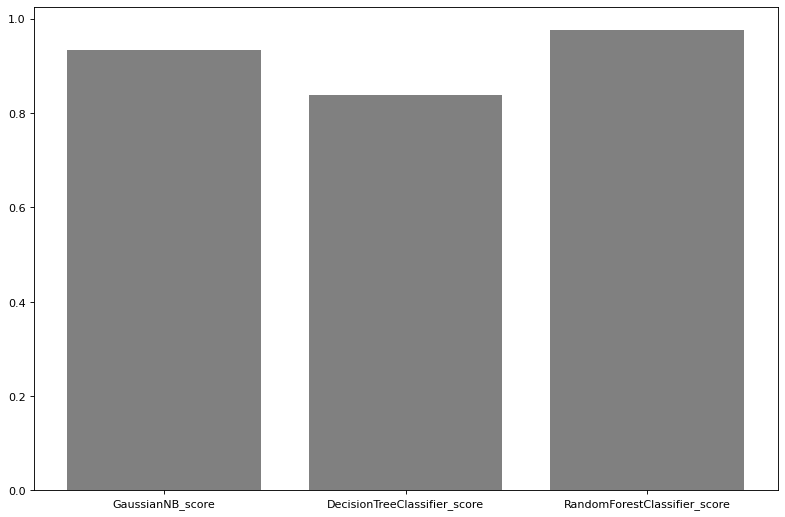

In [ ]:
plt.figure(figsize=(12, 8), dpi=80)
plt.bar(range(len(acc_dict)), list(acc_dict.values()), align='center', color="gray")
plt.xticks(range(len(acc_dict)), list(acc_dict.keys()))
plt.show()

In [ ]:
# Random Forest gives the best result.